# **1. Importing Libraries and Loading Dataset**

In [2]:
# Downloading additional packages
!pip install neattext
!pip install pyspellchecker==0.5.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.0 MB/s eta 0:00:00a 0:00:01


In [3]:
# Basic Dependencies
import numpy as np # linear algebra
import pandas as pd # data processing
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
# For more plotting options
import seaborn as sns
plt.style.use('seaborn-darkgrid')
# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
# wordclound
from PIL import Image # Python Imaging Library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# For machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import io # allows us to manage the file-related input and output operations
import re # regular expression
import time
import math
import string # create a string template for simpler string substitutions
import urllib #Python module for fetching URLs
import requests # The requests module allows you to send HTTP requests using Python
import neattext.functions as nfx # NLP package for cleaning text.


# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Fetching file from Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
/kaggle/input/fifa-world-cup-2022-tweets/fifa_world_cup_2022_tweets.csv


In [15]:
# Loading up the data into a DataFrame
tweet_data = pd.read_csv('/kaggle/input/fifa-world-cup-2022-tweets/fifa_world_cup_2022_tweets.csv', encoding="ISO-8859-1", parse_dates=['Date Created'])

# Shape of data.
print(f'Diamentions: {tweet_data.shape[0]} x {tweet_data.shape[1]}')

# Top 5 row of dataframe
tweet_data.head()

Diamentions: 22524 x 6


,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [5]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Unnamed: 0       22524 non-null  int64              
 1   Date Created     22524 non-null  datetime64[ns, UTC]
 2   Number of Likes  22524 non-null  int64              
 3   Source of Tweet  22524 non-null  object             
 4   Tweet            22524 non-null  object             
 5   Sentiment        22524 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 1.0+ MB


# **2. Driver Functions for Vistualization**

In [20]:
################################## DRIVER FUNCTION - 1 ################################## 
################################### MAKE DONUTCHART ####################################

def makeDonutChart(Height_val, Width_val, DataFrame, Categorical_data, row_amount, Title_text):

  """ Function which make a donut plot by taking chart diamentions, target dataframe and target column
  along with the number of rows which you want to filter out/visualize on tree map as input"""
  
  # Creating a filttered dataframe
  madeup_df = DataFrame[Categorical_data].value_counts().reset_index().rename(columns={
      'index': Categorical_data, Categorical_data:'Count'}).sort_values(by='Count', ascending=False)

  # Chart Body
  fig = px.pie(madeup_df[:row_amount], values='Count', 
               names = Categorical_data, hole=.5, 
               height = Height_val, width = Width_val, 
               title = Title_text,
               color_discrete_sequence = px.colors.sequential.Agsunset)
  fig.update_layout(legend=dict(font = 
                                dict(size=12, color= "black"),
                                bgcolor="LightSteelBlue", 
                                bordercolor="Black", 
                                borderwidth = 2))
  # ploting figure as output
  return fig.show()

In [21]:
##################################  DRIVER FUNCTION - 2 #################################
####################################33 MAKE TREEMAP #####################################

def makeTreeMap(Height_val, Width_val, limit, DataFrame, Categorical_data, function, Title_Text):

  """ Function which make a Treemap plot of the given data """

  # creating a datafram
  madeup_df = DataFrame[Categorical_data].value_counts()[0:limit].reset_index().rename(
      columns={'index':Categorical_data, 
               Categorical_data:'count'})
  # Using plotly to plot a tree map
  fig = px.treemap(madeup_df[:limit], 
                   path=[px.Constant("Tree Map"), 
                         Categorical_data], 
                   color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'], 
                   values = function)
  fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), 
                    height = Height_val, 
                    width = Width_val, 
                    plot_bgcolor='#2d3035', 
                    paper_bgcolor='#2d3035',
                    title_font=dict(size=25, color='#a5a7ab', 
                                    family="Muli, sans-serif"),
                    font=dict(color='#8a8d93'), 
                    title= Title_Text)
  return fig.show()

In [22]:
def makeBarplot(Height_val, Width_val, limit, DataFrame, Categorical_data, Numerical_data, Title_Text):
    """ This function takes dataframe and its columns with categorical 
    and numerical data to make a horizontal barplot """
    # Using matplotlib to plot a line chart to vitualize the data above 
    sns.barplot(y = DataFrame[Categorical_data][:limit], x= DataFrame[Numerical_data][:limit], palette=('icefire'))
    plt.xticks(rotation = 90)
    fig = plt.gcf()
    fig.set_size_inches(Height_val, Width_val)
    plt.title(Title_Text)
    plt.show()

# **3. Driver Functions for EDA**

In [18]:
################################## DRIVER FUNCTION - 2 ################################## 
#########################################################################################

def textExtracter(dataframe, column, neattext_function):
    """ Function that extracts text element from a sentence with the help
    of neattext function and returns a dataframe with a count value """
    # Using neattext to extract desired text element
    extracts = dataframe[column].apply(neattext_function)

    # Looping through the tweet column to extract text elements
    extracted_elements =[]
    for i in range(len(extracts)):
        if extracts[i]:
            for j in range(len(extracts[i])):
                extracted_elements.append(extracts[i][j])
            else:
                continue

    # converting the list to dataframe
    extracted_df = pd.DataFrame(extracted_elements, columns=['extracts'])
    return extracted_df

# **4. Exploratory Data Analysis**

> # Sentiment Distribution

In [23]:
makeDonutChart(450, 700, tweet_data, 'Sentiment', None, 'Sentiment Distribution across the tweets made')

> # Hashtags

In [25]:
# Assigning a variable for our hashtag dataframe
hashtags = textExtracter(tweet_data, 'Tweet', nfx.extract_hashtags)

# Ploting a treemap for Hashtag 
makeTreeMap(500, 800, 10, hashtags, 'extracts', 'count', 'Top 10 Trending hashtags')

> # UserHandles

In [26]:
# Assigning a variable for our UserHandles dataframe
userhandles = textExtracter(tweet_data, 'Tweet', nfx.extract_userhandles)

# Ploting a treemap for Hashtag 
Make_TreeMap(500, 800, 10, userhandles, 'extracts', 'count', 'Top 10 Trending Userhandles')

> # Popular Source of Tweet

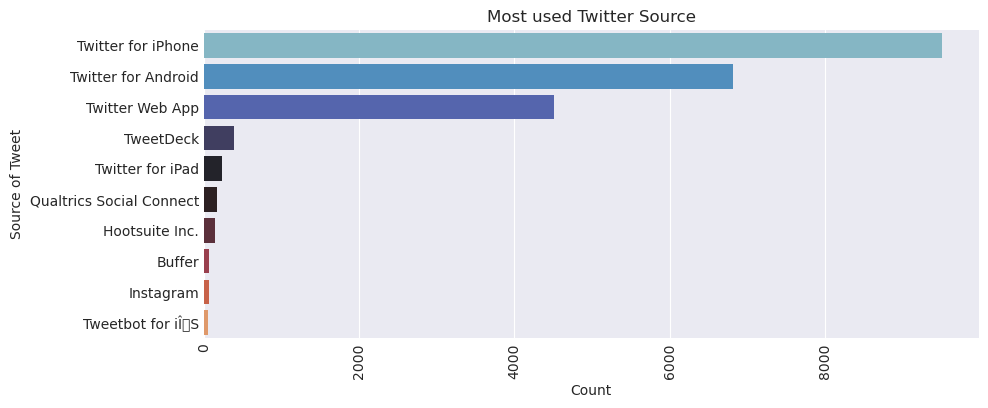

In [31]:
# Creating a dataframe which will contain type of sources and there count
tweet_source = tweet_data['Source of Tweet'].value_counts().reset_index().rename(
    columns={'index':'Source of Tweet','Source of Tweet':'Count'})

# # Creatig a plot for top 10 most used platform for twitter
makeBarplot(10, 4, 10, tweet_source, 'Source of Tweet', 'Count', 'Most used Twitter Source')

# 3. Text Cleaning

Text cleaning is the process of preparing raw text for any kind of mechine learning model so that they/machines can understand human language. Gathering, sorting, and preparing data is the most important step in the data analysis process – bad data can have cumulative negative effects downstream if it is not corrected.

So, Lets start the process with removing the concatnated words (contractions), removing hashtags, Stopwords in different languages and other unwanted characters.

In [ ]:
# removing contractions
tweet_data['OriginalTweet'] = tweet_data['OriginalTweet'].apply(nfx.fix_contractions)

In [ ]:
# removing contractions and #tags with words
tweet_data['OriginalTweet'] = tweet_data['OriginalTweet'].apply(nfx.remove_hashtags)